## Employee Salaries for different job roles DataSet

### Overview

Data science jobs are some of the fastest-growing and most in-demand roles in technology. Since 2012, Data Scientist roles have increased by 650 percent, and this rise shows no sign of stopping. The U.S. Bureau of Labor Statistics predicts that the demand for data science skills will increase another 27.9 percent by 2026. According to a report from McKinsey, this translates to a shortage of between 140,000 and 190,000 people with analytical skills in the U.S. alone, not to mention another 1.5 million managers and analysts who will be required to understand how data analysis drives decision-making.

Data Scientist salaries have also risen with demand; Data Scientists can typically expect to make six figures. Demand also translates into an ability to relocate far more easily—from city to city, and even internationally.

### Feature Description

* `work_year`: The year the salary was paid
* `experience_level`: The experience level in the job during the year with the following possible values:
    * `EN` Entry-level / Junior
    * `MI` Mid-level / Intermediate
    * `SE` Senior-level/ Expert
    * `EX` Executive-level / Director
* `employment_type`: The type of employment for the role: 
    * `PT` Part-time 
    * `FT` Full-time 
    * `CT` Contract 
    * `FL` Freelance
* `job_title`: The role worked in during the year
* `salary`: The total gross salary amount paid.
* `salary_currency`: The currency of the salary paid as an ISO 4217 currency code.
* `salary_in_usd`: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com)
* `employee_residence`: Employee's primary country of residence in during the work year as an ISO 3166 country code
* `remote_ratio`: The overall amount of work done remotely, possible values are as follows:
    * `0` No remote work (less than 20%)
    * `50` Partially remote
    * `100` Fully remote (more than 80%)
* `company_location`: The country of the employer's main office or contracting branch as an ISO 3166 country code
* `company_size`: The average number of people that worked for the company during the year:
    * `S` less than 50 employees (small)
    * `M` 50 to 250 employees (medium)
    * `L` more than 250 employees (large)

### Goal of the Notebook:

1. **Univariate Analysis:** Explore every feature in the dataset
2. **Work Year Analysis:** Analyze work year trends, including salary and remote work ratio.
3. **Experience Level Analysis:** Explore experience levels, employment types, top 3 job titles, and company sizes.
4. **Company Location Analysis:** Examine company locations and their relationship with experience levels.
5. **Salary Analysis:** Investigate salary trends with respect to work year, experience level, company size, job title, and remote work ratio.

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
import warnings
warnings.filterwarnings("ignore")

In [274]:
salary_data=pd.read_csv(r"C:\Users\akash\OneDrive\Desktop\Intership\CognoRise InfoTech 10-04-24\Employee Salaries for different job roles\ds_salaries.csv")

In [275]:
salary_data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [276]:
salary_data.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [277]:
row_col=salary_data.shape
print(f"Total number of Rows is: {row_col[0]}\nTotal number of Columns is: {row_col[1]}")

Total number of Rows is: 607
Total number of Columns is: 12


In [278]:
col_name=salary_data.columns
for i in range(len(col_name)):
    print(i+1, col_name[i])

1 work_year
2 experience_level
3 employment_type
4 job_title
5 salary
6 salary_currency
7 salary_in_usd
8 employee_residence
9 remote_ratio
10 company_location
11 company_size


In [279]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [280]:
salary_data.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [281]:
# Unnamed column is not useful for Data analysis so I'll Drop that column:

salary_data.drop(columns="Unnamed: 0",inplace=True)

In [282]:
row_col=salary_data.shape
print(f"Total number of Rows is: {row_col[0]}\nTotal number of Columns is: {row_col[1]}")

Total number of Rows is: 607
Total number of Columns is: 11


In [283]:
salary_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [284]:
# Check for the missing values:

salary_data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [285]:
# Check for the duplicate values:

salary_data.duplicated().sum()

42

In [286]:
round(salary_data.describe(),2)

,work_year,salary,salary_in_usd,remote_ratio
count,607.00,607.00,607.00,607.00
mean,2021.41,324000.06,112297.87,70.92
std,0.69,1544357.49,70957.26,40.71
min,2020.00,4000.00,2859.00,0.00
25%,2021.00,70000.00,62726.00,50.00
50%,2022.00,115000.00,101570.00,100.00
75%,2022.00,165000.00,150000.00,100.00
max,2022.00,30400000.00,600000.00,100.00


In [287]:
salary_data.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


In [288]:
# Checking for all the unique values in categorical variables:

categorical_column=[i for i in salary_data.select_dtypes("object")]

for i in categorical_column:
    print("Unique Values in ",i," : ",salary_data[i].unique(),"\n")

Unique Values in  experience_level  :  ['MI' 'SE' 'EN' 'EX'] 

Unique Values in  employment_type  :  ['FT' 'CT' 'PT' 'FL'] 

Unique Values in  job_title  :  ['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Lea

In [289]:
# Checking for all the unique values count in categorical variables:

print ('\nNumber of unique values in Categorical variables:\n')
print (salary_data[categorical_column].nunique())


Number of unique values in Categorical variables:

experience_level       4
employment_type        4
job_title             50
salary_currency       17
employee_residence    57
company_location      50
company_size           3
dtype: int64


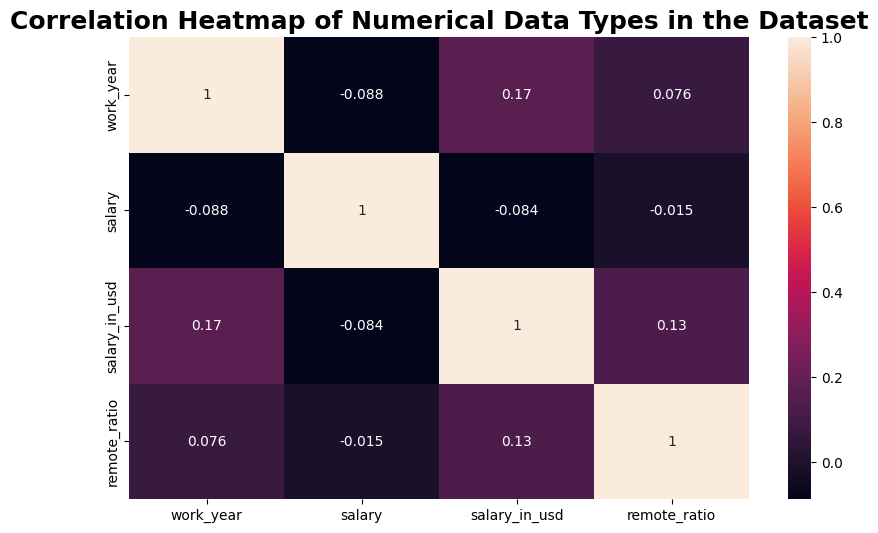

In [290]:
plt.figure(figsize=(10,6))
sns.heatmap(salary_data[["work_year","salary","salary_in_usd","remote_ratio"]].corr(), annot=True)
plt.title("Correlation Heatmap of Numerical Data Types in the Dataset",fontsize=18,fontweight='bold')
plt.show()

### Summary of Findings
* The Dataset contains 607 records and 12 features.
* There are no missing values in the dataset.
* Unnamed column was not useful for our analysis (Dropped column).
* Data contains values from 2020 to 2022 Work Year.
* There are 4 unique experience levels with the maximum occurance of SE.
* The Dataset contains 4 employment types with the maximum occurance FT (Full time employment).
* There are 50 unique job titles. 
* Salary for the Employee is being recorded in 17 different currencies.
* Employees are resident in 57 locations while the Companies are located in 50 locations.

In [291]:
# Renaming Experience level column values with the complete form:

salary_data.experience_level.replace({'EN':'Entry-level / Junior',"MI":"Mid-level / Intermediate","SE":"Senior-level/ Expert","EX":"Executive-level / Director"},inplace=True)

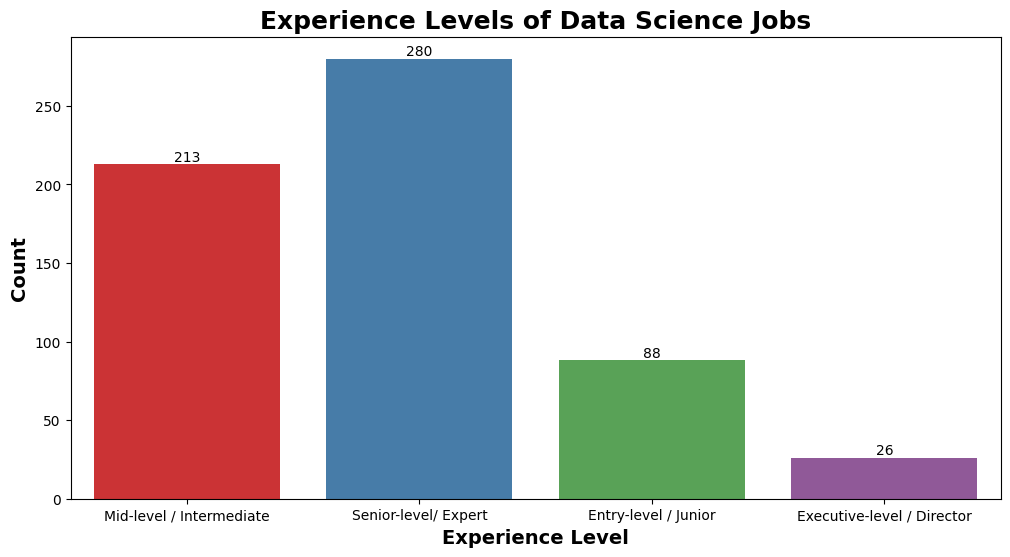

In [292]:
plt.figure(figsize=(12,6))
colors = sns.color_palette('Set1', len(salary_data['experience_level'].unique()))
plt.title('Experience Levels of Data Science Jobs', fontsize=18,fontweight='bold')
ax = sns.countplot(x='experience_level', data=salary_data, palette=colors)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Experience Level', fontsize=14,fontweight='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')
plt.show()
        

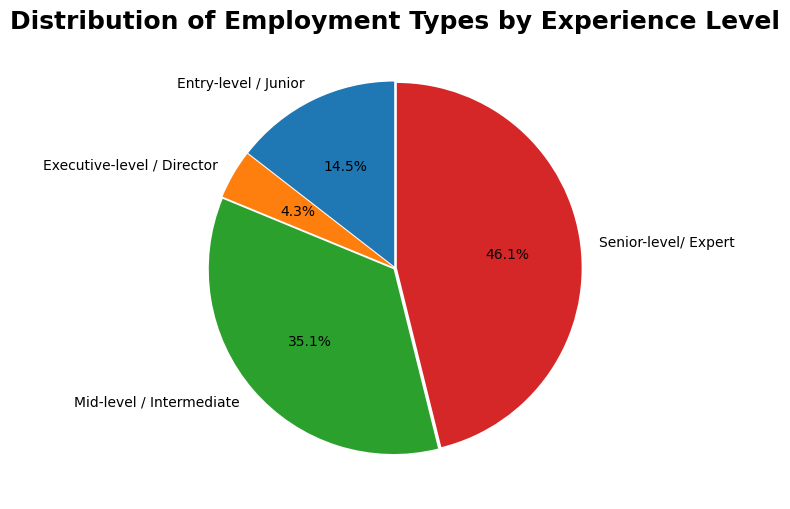

In [293]:
experience_counts=salary_data.groupby("experience_level")["employment_type"].count()

xplode = [0.01] * len(experience_counts)  # Explode every slice

plt.figure(figsize=(6,6))
plt.pie(experience_counts, labels=experience_counts.index, autopct='%1.1f%%', startangle=90, explode=xplode)
plt.title('Distribution of Employment Types by Experience Level', fontsize=18,fontweight='bold')
plt.show()

In [294]:
# Renaming Employement type column values with the complete form:

salary_data.employment_type.replace({"PT":"Part-time","FT":"Full-time","CT":"Contract","FL":"Freelance"},inplace=True)

In [295]:
employeement_type_count=salary_data.groupby("employment_type")["experience_level"].count()

In [296]:
employeement_type_ratio=salary_data.employment_type.value_counts(normalize=True)
print(round(employeement_type_ratio*100,2))

employment_type
Full-time    96.87
Part-time     1.65
Contract      0.82
Freelance     0.66
Name: proportion, dtype: float64


<Figure size 1200x600 with 0 Axes>

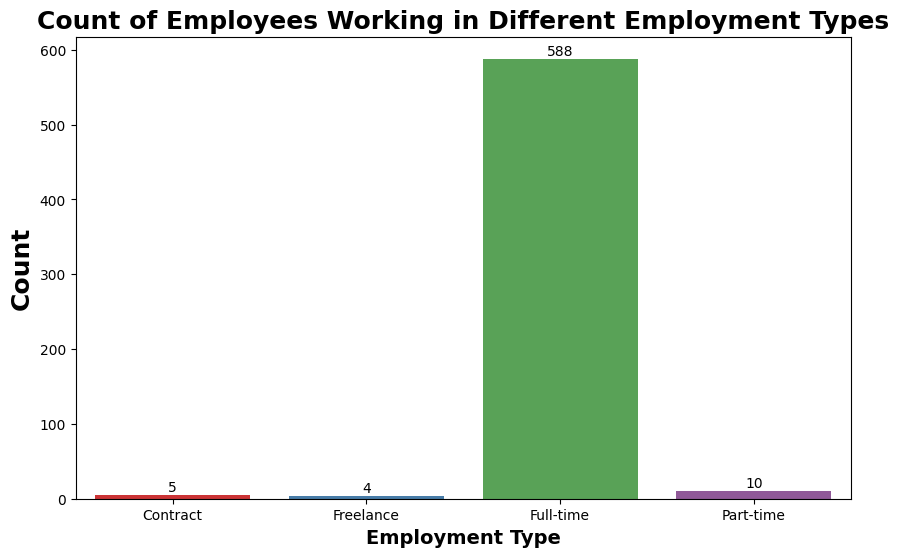

In [297]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette('Set1', len(employeement_type_count))

plt.figure(figsize=(10, 6))
sns.barplot(x=employeement_type_count.index, y=employeement_type_count.values, palette=colors)
plt.title('Count of Employees Working in Different Employment Types',fontsize=18,fontweight='bold')
plt.xlabel('Employment Type',fontsize=14,fontweight='bold')
plt.ylabel('Count',fontsize=18,fontweight='bold')

# Add count labels over the bars
for index, value in enumerate(employeement_type_count.values):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')

plt.show()

In [298]:
employee_count_by_year=salary_data.groupby("work_year")["experience_level"].count()

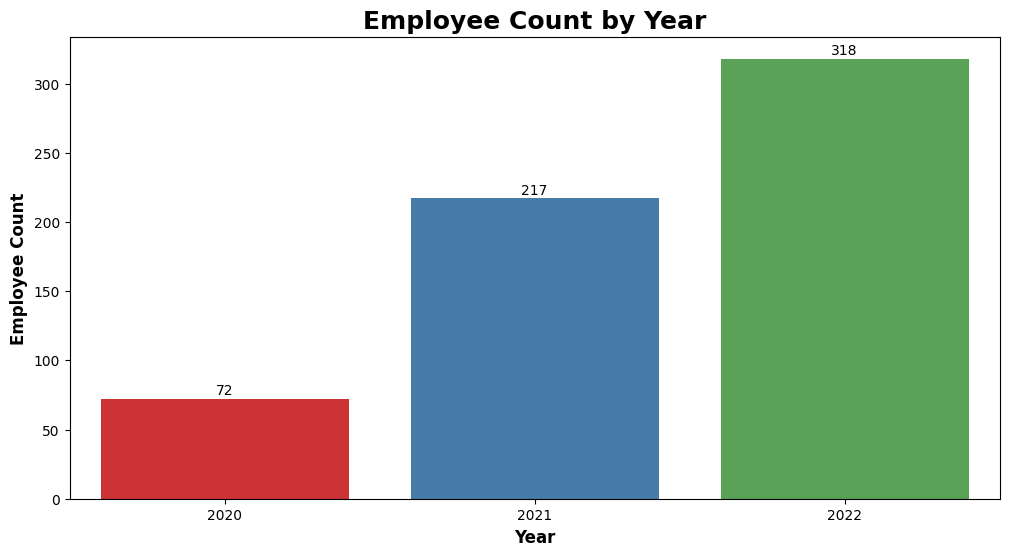

In [299]:
plt.figure(figsize=(12, 6))
sns.barplot(x=employee_count_by_year.index, y=employee_count_by_year.values, palette='Set1')
plt.title('Employee Count by Year',fontsize=18,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylabel('Employee Count', fontsize=12,fontweight='bold')

# Add count labels over the bars
for index, value in enumerate(employee_count_by_year.values):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')

plt.show()


In [300]:
employee_type_max_salary=salary_data.groupby("employment_type")["salary_in_usd"].max()

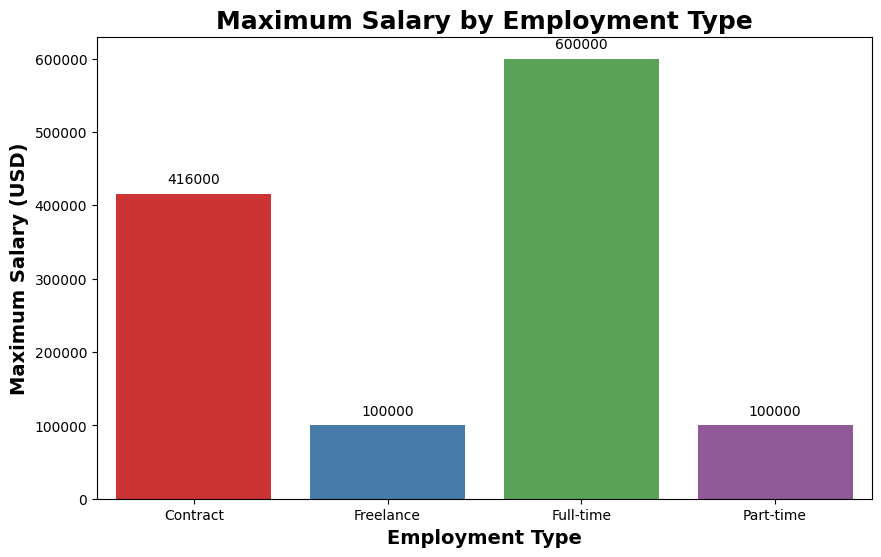

In [301]:
plt.figure(figsize=(10, 6))
sns.barplot(x=employee_type_max_salary.index, y=employee_type_max_salary.values, palette='Set1')
plt.title('Maximum Salary by Employment Type', fontsize=18,fontweight='bold')
plt.xlabel('Employment Type', fontsize=14,fontweight='bold')
plt.ylabel('Maximum Salary (USD)', fontsize=14,fontweight='bold')

# Add salary labels over the bars
for index, value in enumerate(employee_type_max_salary.values):
    plt.text(index, value + 10000, str(value), ha='center', va='bottom')

plt.show()


In [302]:
employee_count_by_job_title=salary_data.groupby("job_title")["job_title"].count()

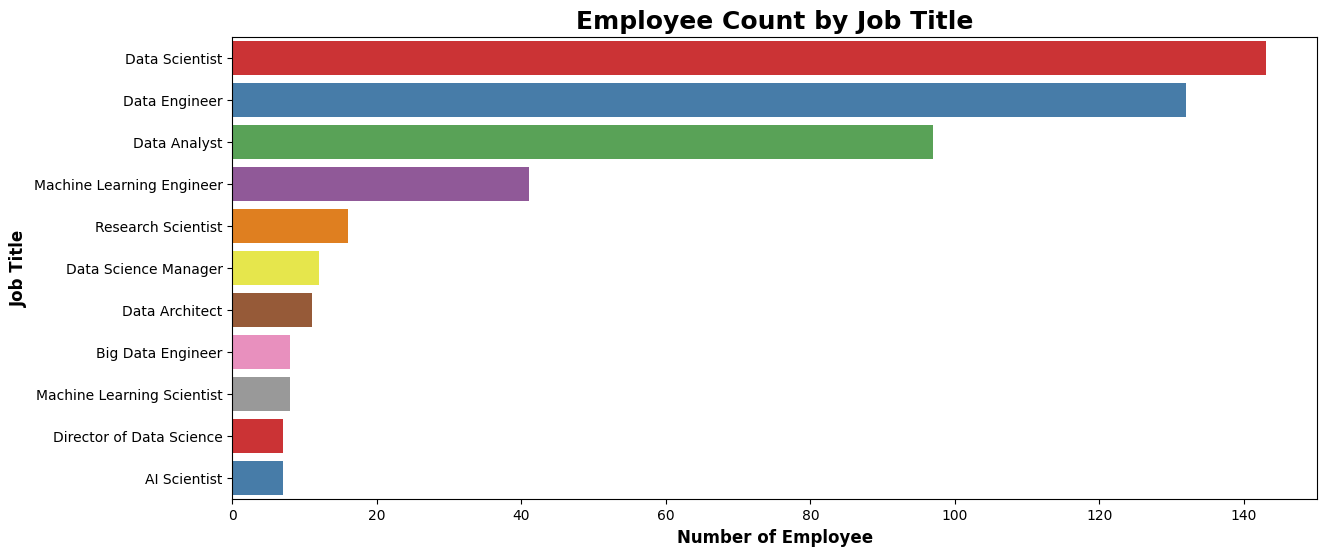

In [303]:
employee_count_sorted = employee_count_by_job_title.sort_values(ascending=False)[:11]

plt.figure(figsize=(14, 6))
sns.barplot(x=employee_count_sorted.values, y=employee_count_sorted.index, palette='Set1')
plt.title('Employee Count by Job Title', fontsize=18,fontweight='bold')
plt.xlabel('Number of Employee', fontsize=12,fontweight='bold')
plt.ylabel('Job Title', fontsize=12,fontweight='bold')
plt.show()


In [304]:
# Top 10 Company Location with their maximum salary and the Job Title:

top_locations = salary_data.groupby("company_location")["salary_in_usd"].max().sort_values(ascending=False)[:11]
top_locations_with_salary_title = salary_data[salary_data["company_location"].isin(top_locations.index)]
top_locations_with_salary_title = top_locations_with_salary_title.groupby("company_location").apply(lambda x: x.loc[x["salary_in_usd"].idxmax()])[["job_title", "salary_in_usd"]]

In [305]:
top_locations_with_salary_title

,job_title,salary_in_usd
company_location,,
AU,Computer Vision Software Engineer,150000
CA,Machine Learning Scientist,225000
CH,Data Scientist,122346
DE,Principal Data Scientist,173762
FR,Data Science Manager,152000
GB,Data Scientist,183228
JP,Machine Learning Scientist,260000
NZ,Lead Data Engineer,125000
PL,Director of Data Science,153667


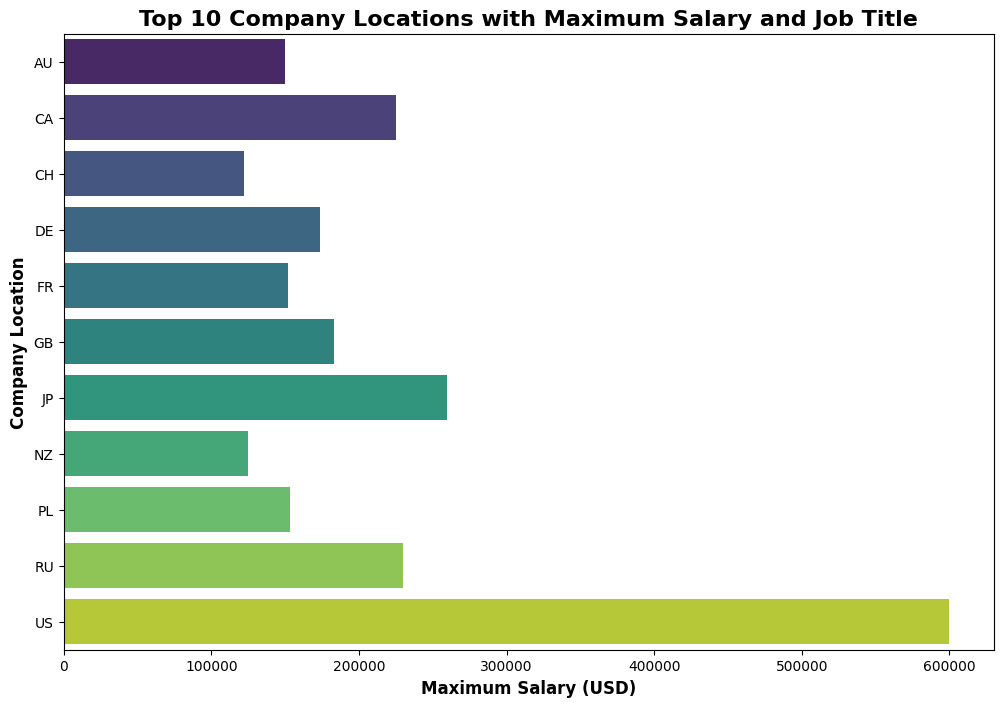

In [306]:
plt.figure(figsize=(12, 8))
sns.barplot(x="salary_in_usd", y=top_locations_with_salary_title.index, data=top_locations_with_salary_title, palette='viridis')
plt.title('Top 10 Company Locations with Maximum Salary and Job Title', fontsize=16,fontweight='bold')
plt.xlabel('Maximum Salary (USD)', fontsize=12,fontweight='bold')
plt.ylabel('Company Location', fontsize=12,fontweight='bold')
plt.show()


1. **Average Maximum Salary:** $193,600
2. **Top Job Title:** Principal Data Engineer (USD 600,000) in the US
3. **Lowest Maximum Salary:** Lead Data Engineer (USD 125,000) in NZ
4. **Most Common Job Title:** Data Scientist

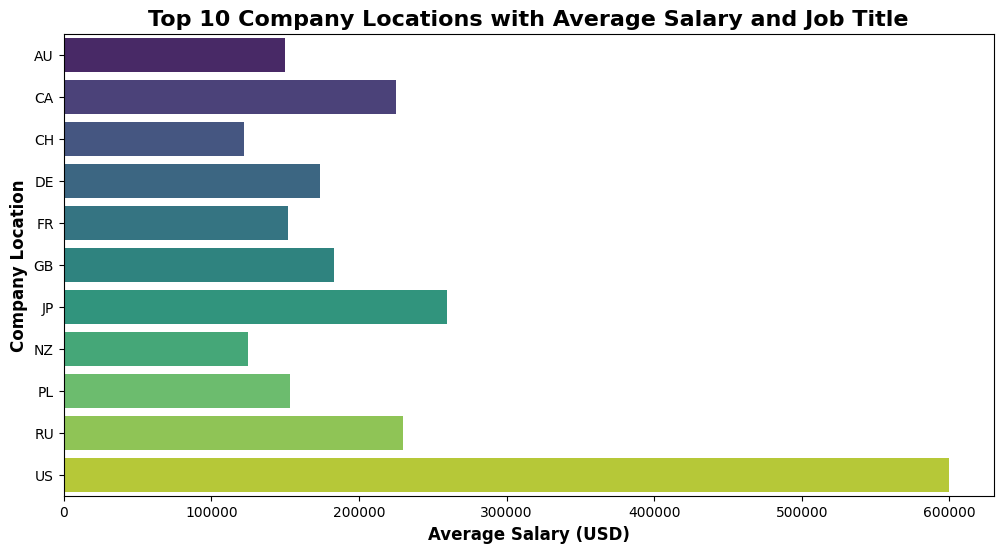

In [307]:
# Top 10 Company Location with their average salary and the Job Title:
# Calculate the average salary for each company location
avg_salary_by_location = salary_data.groupby("company_location")["salary_in_usd"].mean().sort_values(ascending=False)[:10]

# Filter the data to include only the top 10 company locations
top_locations_with_avg_salary_title = salary_data[salary_data["company_location"].isin(avg_salary_by_location.index)]

# Group the data by company location and select the row with the highest salary for each location
top_locations_with_avg_salary_title = top_locations_with_salary_title.groupby("company_location").apply(lambda x: x.loc[x["salary_in_usd"].idxmax()])[["job_title", "salary_in_usd"]]

# Create a horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="salary_in_usd", y=top_locations_with_salary_title.index, data=top_locations_with_salary_title, palette='viridis')
plt.title('Top 10 Company Locations with Average Salary and Job Title', fontsize=16,fontweight='bold')
plt.xlabel('Average Salary (USD)', fontsize=12,fontweight='bold')
plt.ylabel('Company Location', fontsize=12,fontweight='bold')
plt.show()


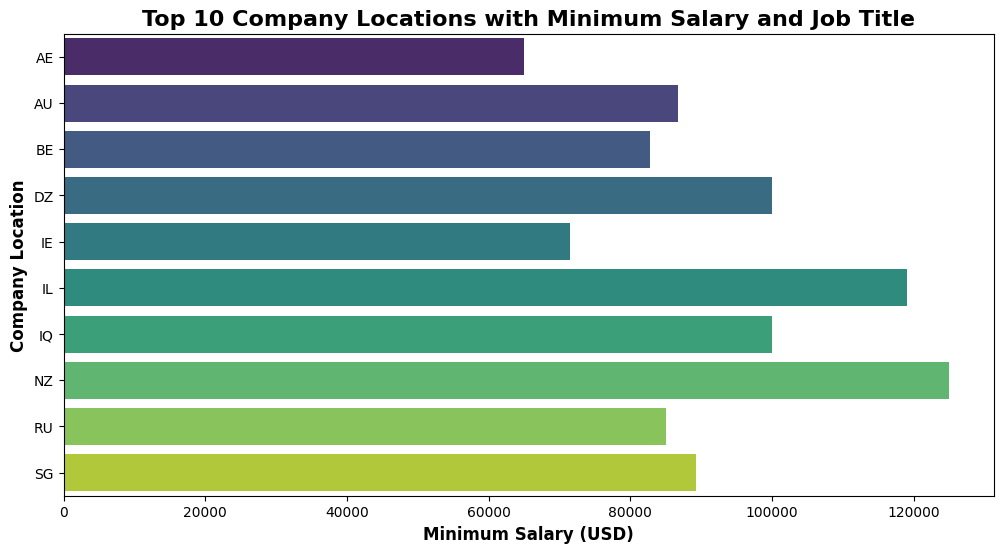

In [308]:
# Top 10 Company Location with their maximum salary and the Job Title:
# Calculate the minimum salary for each company location
min_salary_by_location = salary_data.groupby("company_location")["salary_in_usd"].min().sort_values(ascending=False)[:10]

# Filter the data to include only the top 10 company locations
top_locations_with_min_salary_title = salary_data[salary_data["company_location"].isin(min_salary_by_location.index)]

# Group the data by company location and select the row with the minimum salary for each location
top_locations_with_min_salary_title = top_locations_with_min_salary_title.groupby("company_location").apply(lambda x: x.loc[x["salary_in_usd"].idxmin()])[["job_title", "salary_in_usd"]]

# Create a horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="salary_in_usd", y=top_locations_with_min_salary_title.index, data=top_locations_with_min_salary_title, palette='viridis')
plt.title('Top 10 Company Locations with Minimum Salary and Job Title', fontsize=16,fontweight='bold')
plt.xlabel('Minimum Salary (USD)', fontsize=12,fontweight='bold')
plt.ylabel('Company Location', fontsize=12,fontweight='bold')
plt.show()


In [309]:
# To visualize the average salary by location for the top 6 locations
avg_salary_by_location = pd.pivot_table(data=salary_data,index=['company_location'],values=['salary_in_usd'], aggfunc='mean').sort_values(by=['salary_in_usd'],ascending=False)[:6]


In [310]:
avg_salary_by_location

,salary_in_usd
company_location,
RU,157500.000000
US,144055.261972
NZ,125000.000000
IL,119059.000000
JP,114127.333333
AU,108042.666667


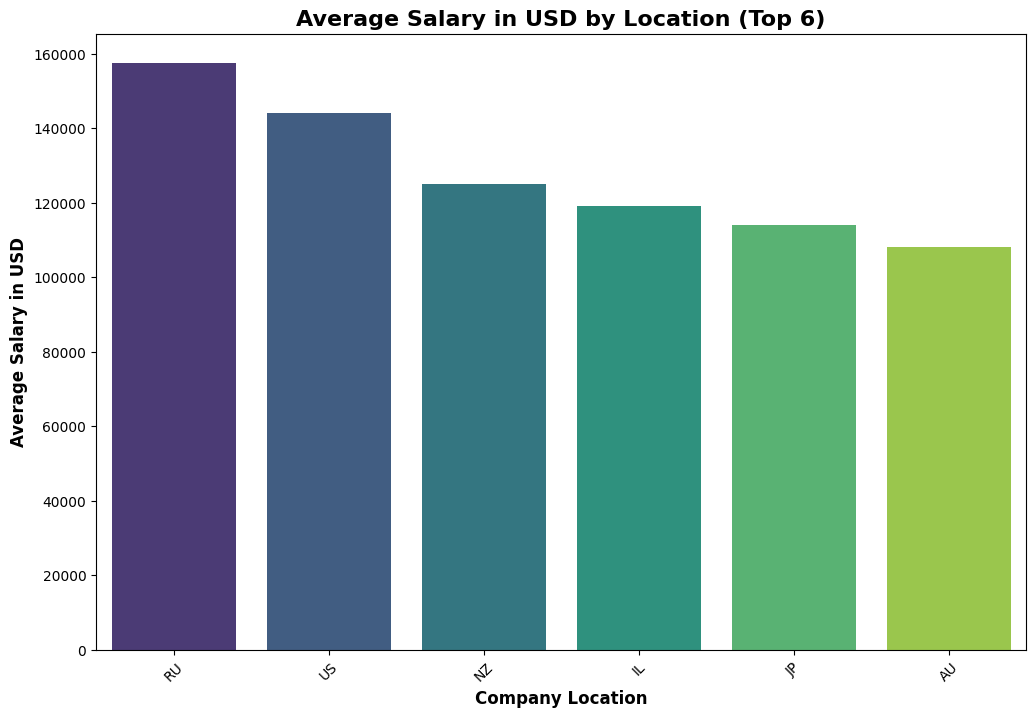

In [321]:
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_salary_by_location.index, y='salary_in_usd', data=avg_salary_by_location, palette='viridis')
plt.title('Average Salary in USD by Location (Top 6)', fontsize=16,fontweight='bold')
plt.xlabel('Company Location', fontsize=12,fontweight='bold')
plt.ylabel('Average Salary in USD', fontsize=12,fontweight='bold')
plt.xticks(rotation=45)
plt.show()

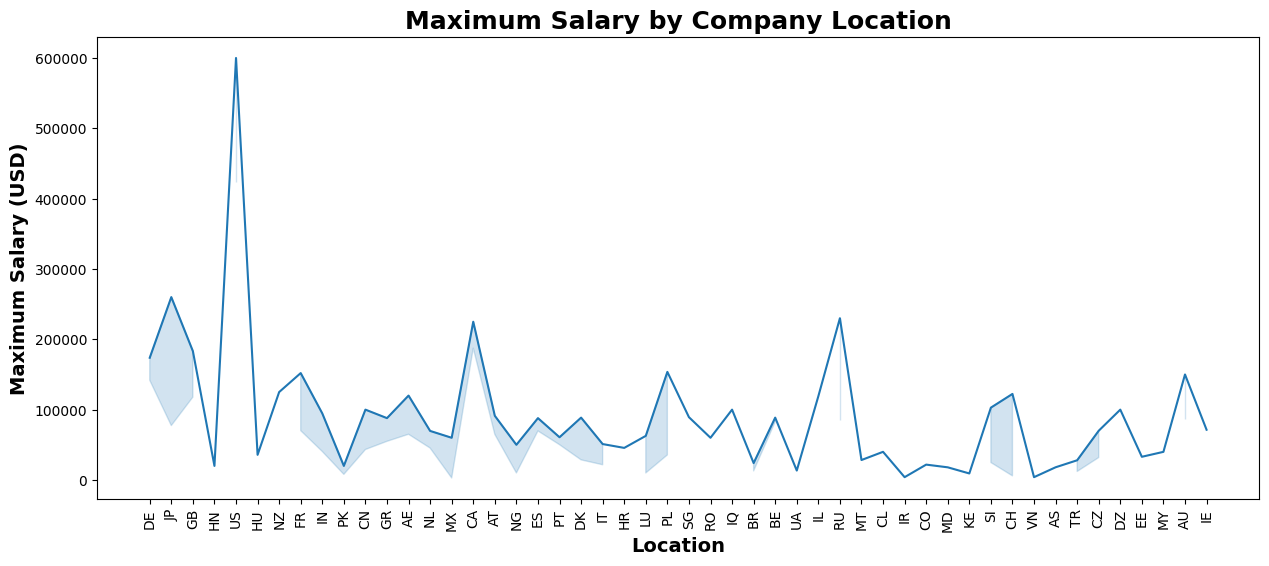

In [312]:
plt.figure(figsize=(15,6))
plt.title('Maximum Salary by Company Location', fontsize=18, fontweight='bold')
sns.lineplot(y='salary_in_usd', x='company_location', data=salary_data, estimator=max)
plt.xlabel('Location', fontsize=14, fontweight='bold')
plt.ylabel('Maximum Salary (USD)', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.show()


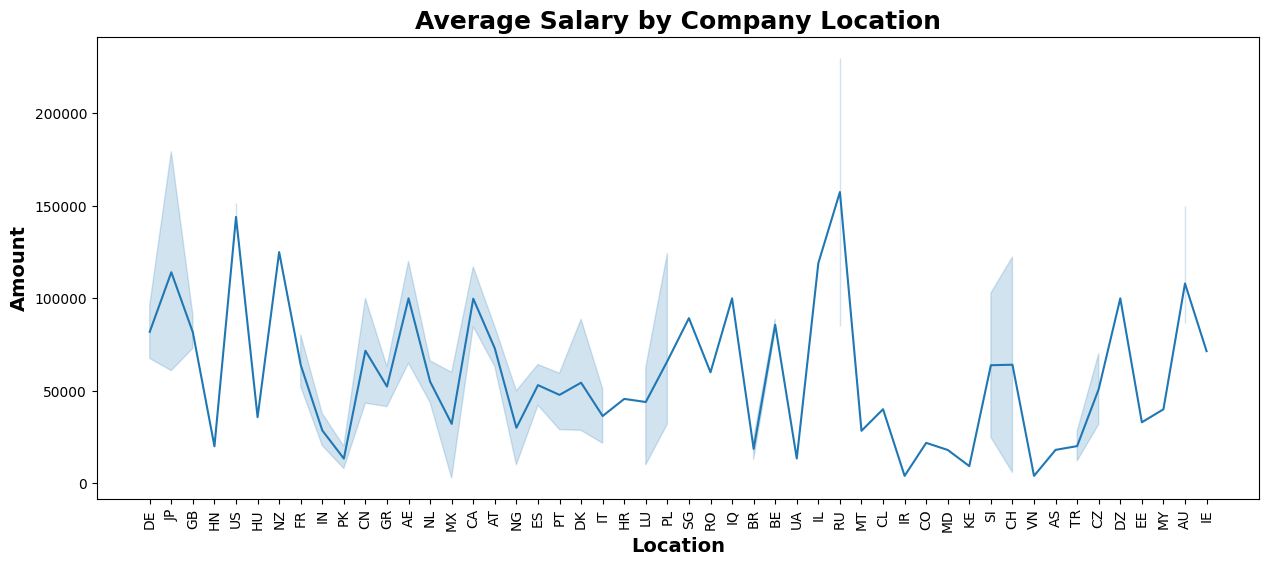

In [313]:
plt.figure(figsize=(15,6))
plt.title('Average Salary by Company Location', fontsize=18, fontweight='bold')
sns.lineplot(y='salary_in_usd', x='company_location', data=salary_data)
plt.xlabel('Location', fontsize=14, fontweight='bold')
plt.ylabel('Amount', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

In [314]:
# Renaming Company size column values with the complete form:

salary_data.company_size.replace({'S':'Small(<50)','M':'Medium(50-250)','L':'Large(>250)'}, inplace=True)

In [315]:
employee_asper_company_type=salary_data.groupby("company_size")["employment_type"].count()

In [316]:
employee_asper_company_type

company_size
Large(>250)       198
Medium(50-250)    326
Small(<50)         83
Name: employment_type, dtype: int64

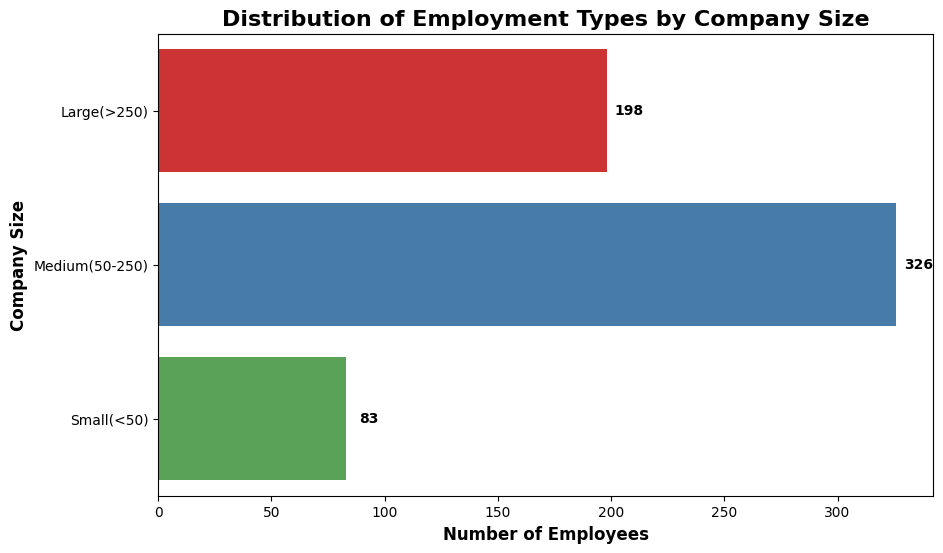

In [322]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=employee_asper_company_type.values, y=employee_asper_company_type.index, palette='Set1')
plt.title('Distribution of Employment Types by Company Size', fontsize=16,fontweight='bold')
plt.xlabel('Number of Employees', fontsize=12,fontweight='bold')
plt.ylabel('Company Size', fontsize=12,fontweight='bold')

# Add count of employees on the bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 10, p.get_y() + p.get_height() / 2, '{:.0f}'.format(width), ha='center', va='center', fontsize=10, color='black', fontweight='bold')

plt.show()


In [318]:
size_ratio=salary_data.company_size.value_counts(normalize=True)
print(round(size_ratio*100,2))

company_size
Medium(50-250)    53.71
Large(>250)       32.62
Small(<50)        13.67
Name: proportion, dtype: float64


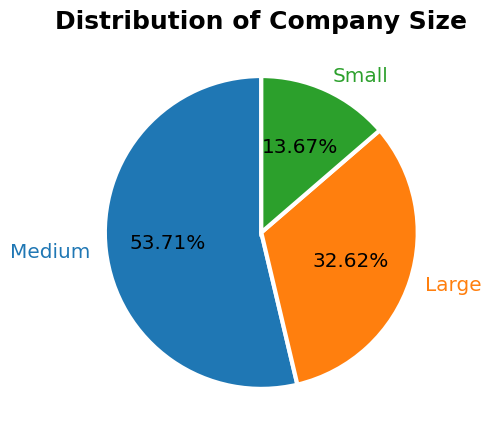

In [323]:
fig, ax = plt.subplots(figsize=(5,5))
x=size_ratio
labels = ['Medium','Large','Small']

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='black')
plt.setp(texts, fontweight=500)
ax.set_title('Distribution of Company Size', fontsize=18,fontweight='bold')
plt.tight_layout()

***Most companies with data science professionals are medium-sized companies, with 326 positions. Small companies have the fewest data science jobs, with only 83 positions. Large companies (>250 employees) have 198 data science positions.***

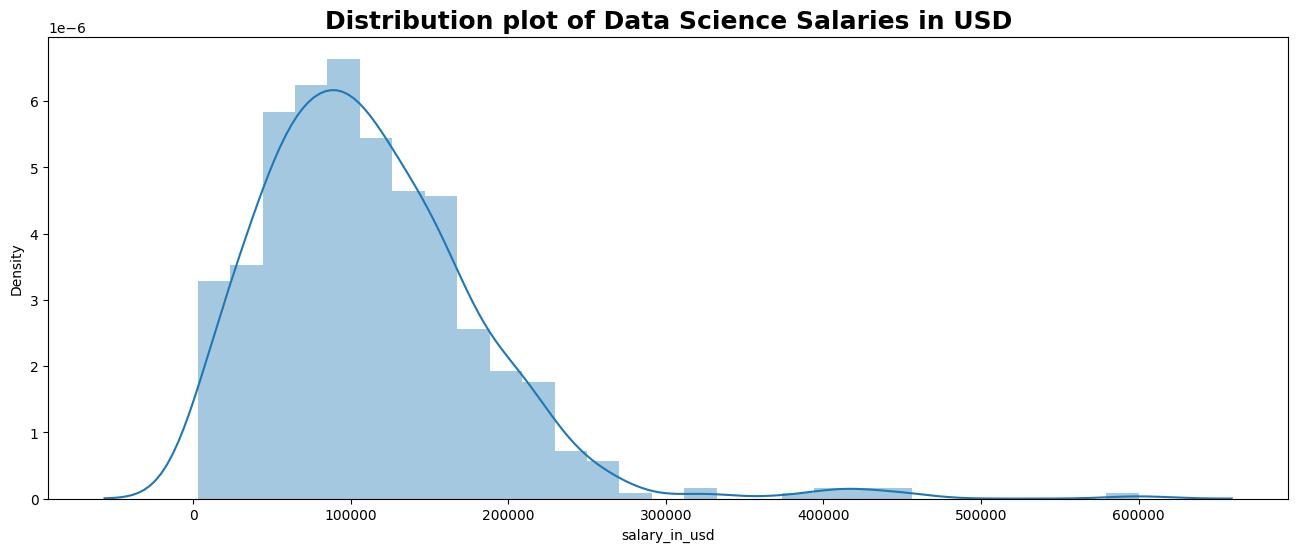

In [324]:
plt.figure(figsize=(16,6))
sns.distplot(salary_data["salary_in_usd"])
plt.title('Distribution plot of Data Science Salaries in USD', fontsize=18,fontweight='bold')
plt.show()

## Summary
* The majority of Data Science jobs require Senior-level/Expert experience, with fewer positions available for Executive-level/Directors.
* Common job titles in the Data Science field include Data Scientist, Data Engineer, Data Analyst, and Machine Learning Engineer.
* Full-time employment is the most common type of employment for Data Science positions.
* While the United States is home to most Data Science employees and companies, Russia offers the highest average salary, followed closely by the United States.
* Both the number of Data Science jobs and the salary tend to increase with years of experience.
* Medium-sized and Large-sized companies tend to offer higher salaries compared to small-sized companies.
* The average salary for Data Science jobs in USD is approximately $112,297.87.